# Cryptocurrency Case Study
The goal of the project is to have a general overview and idea of statistical analysis of cryptocurrency data and to generate a trading strategy algorithm which can be deployed in the trading platforms or web.

# Task 1
The goal of this task is to develop a stastical analysis for the returns of five (5) cryptocurrency tickers and generate findings from the analysis.

## Import Libraries

In [224]:
# Import libraries and mount drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os

import sklearn as sks
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Data Cleaning and Light Data Exploration

In [225]:
# Load the dataframe
BASE_DIR = os.getcwd()
print(BASE_DIR)
filename = '{}\\SwapooLabs Case Study\\data.csv'.format(BASE_DIR)
data = pd.read_csv(filename)
data.head()

c:\Users\Rhaniel delos Santos\Downloads


,datetime,Inst-1-open,Inst-1-high,Inst-1-low,Inst-1-close,Inst-1-volume,Inst-2-open,Inst-2-high,Inst-2-low,Inst-2-close,...,Inst-4-open,Inst-4-high,Inst-4-low,Inst-4-close,Inst-4-volume,Inst-5-open,Inst-5-high,Inst-5-low,Inst-5-close,Inst-5-volume
0,13-09-19 03:00:00,2221.2,2292.6,2209.4,2250.6,2784,61.731707,63.695122,59.731707,60.817073,...,101.002857,101.085714,100.897143,100.977143,1971,57.817391,57.891304,57.752174,57.752174,19286
1,13-09-19 04:00:00,2250.6,2352.4,2215.6,2349.0,4839,60.817073,66.304878,58.048780,65.182927,...,100.977143,101.365714,100.974286,101.365714,7770,57.752174,57.730435,57.730435,57.730435,6429
2,13-09-19 05:00:00,2349.0,2368.8,2293.2,2353.0,2992,65.182927,67.280488,62.609756,64.048780,...,101.365714,101.551429,101.265714,101.391429,2509,57.730435,57.739130,57.713043,57.713043,42143
3,13-09-19 06:00:00,2353.0,2369.2,2251.0,2316.0,5164,64.048780,65.841463,60.560976,61.256098,...,101.391429,101.468571,101.020000,101.142857,12009,57.713043,57.773913,57.752174,57.773913,6429
4,13-09-19 07:00:00,2316.0,2329.8,2242.4,2274.2,2526,61.256098,61.695122,57.182927,59.000000,...,101.142857,101.334286,100.934286,101.225714,4500,57.773913,57.652174,57.639130,57.639130,30714


In [226]:
# Check the information of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       500 non-null    object 
 1   Inst-1-open    500 non-null    float64
 2   Inst-1-high    500 non-null    float64
 3   Inst-1-low     500 non-null    float64
 4   Inst-1-close   500 non-null    float64
 5   Inst-1-volume  500 non-null    int64  
 6   Inst-2-open    500 non-null    float64
 7   Inst-2-high    500 non-null    float64
 8   Inst-2-low     500 non-null    float64
 9   Inst-2-close   500 non-null    float64
 10  Inst-2-volume  500 non-null    int64  
 11  Inst-3-open    500 non-null    float64
 12  Inst-3-high    500 non-null    float64
 13  Inst-3-low     500 non-null    float64
 14  Inst-3-close   500 non-null    float64
 15  Inst-3-volume  500 non-null    int64  
 16  Inst-4-open    500 non-null    float64
 17  Inst-4-high    500 non-null    float64
 18  Inst-4-low

There are no missing values in the dataset

In [227]:
# Check for duplicates
data.duplicated().sum()

0

There are no duplicates in the dataset

Forecasting Returns

The main goal of the project is to model how the five tickers' price will move in the future (up, down, and by how much). This shall be calculated based on the raw data and is the fundamental task in financial modelling. The technical indicators may not be discussed in full detail in this notebook. Please refer to the following site for further readings:

https://www.investopedia.com/terms/t/technicalindicator.asp

Log Returns

Returns are widely used in finance, however log returns are preferred for mathematical modelling of time series, as they are additive across time. Also, while regular returns cannot go below -100%, log returns are not bounded.

To compute the log return, we can simply take the logarithm of the ratio between two consecutive prices. The first row will have an empty return as the previous value is unknown, therefore the empty return data point will be dropped.

Source: kaggle.com

In [228]:
# Define a function for log returns
def log_return(series, periods=1):
  return np.log(series).diff(periods=periods)

C:\Users\Rhaniel delos Santos\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


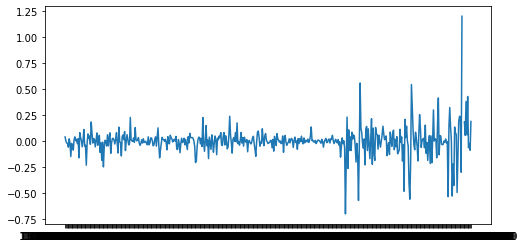

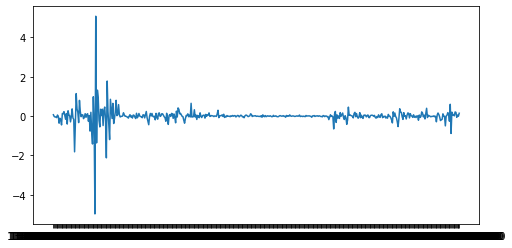

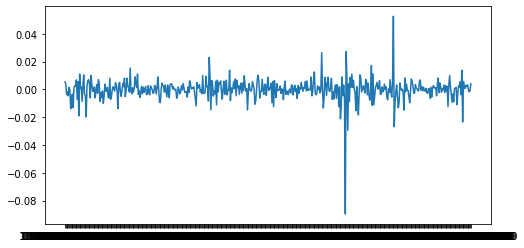

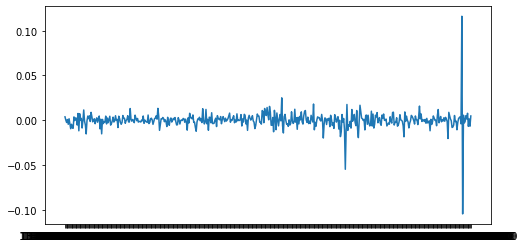

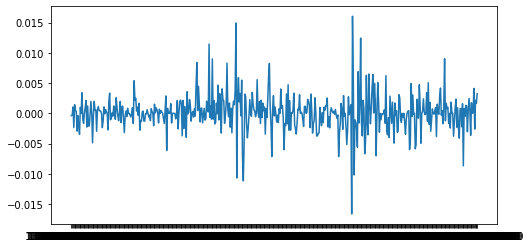

In [229]:
# Import scipy stats
import scipy.stats as stats

# Create time interval
import time
from datetime import datetime

# Plot the log return of the five tickers
lret_1 = log_return(data['Inst-1-close'])[1:]
lret_1.rename('lret_1', inplace=True)

lret_2 = log_return(data['Inst-2-close'])[1:]
lret_2.rename('lret_2', inplace=True)

lret_3 = log_return(data['Inst-3-close'])[1:]
lret_3.rename('lret_3', inplace=True)

lret_4 = log_return(data['Inst-4-close'])[1:]
lret_4.rename('lret_4', inplace=True)

lret_5 = log_return(data['Inst-5-close'])[1:]
lret_5.rename('lret_5', inplace=True)


plt.figure(figsize=(8,4))
plt.plot(data['datetime'][1:], lret_1)
plt.figure(figsize=(8,4))
plt.plot(data['datetime'][1:], lret_2)
plt.figure(figsize=(8,4))
plt.plot(data['datetime'][1:], lret_3)
plt.figure(figsize=(8,4))
plt.plot(data['datetime'][1:], lret_4)
plt.figure(figsize=(8,4))
plt.plot(data['datetime'][1:], lret_5)

In [230]:
# Drop the first row of main dataframe
data = data.iloc[1:,:]

# Add return column
data['lret_1'] = lret_1.to_list()
data['lret_2'] = lret_2.to_list()
data['lret_3'] = lret_3.to_list()
data['lret_4'] = lret_4.to_list()
data['lret_5'] = lret_5.to_list()
data.head()

,datetime,Inst-1-open,Inst-1-high,Inst-1-low,Inst-1-close,Inst-1-volume,Inst-2-open,Inst-2-high,Inst-2-low,Inst-2-close,...,Inst-5-open,Inst-5-high,Inst-5-low,Inst-5-close,Inst-5-volume,lret_1,lret_2,lret_3,lret_4,lret_5
1,13-09-19 04:00:00,2250.6,2352.4,2215.6,2349.0,4839,60.817073,66.304878,58.048780,65.182927,...,57.752174,57.730435,57.730435,57.730435,6429,0.042793,0.069327,0.005385,0.003841,-0.000376
2,13-09-19 05:00:00,2349.0,2368.8,2293.2,2353.0,2992,65.182927,67.280488,62.609756,64.048780,...,57.730435,57.739130,57.713043,57.713043,42143,0.001701,-0.017553,0.003878,0.000254,-0.000301
3,13-09-19 06:00:00,2353.0,2369.2,2251.0,2316.0,5164,64.048780,65.841463,60.560976,61.256098,...,57.713043,57.773913,57.752174,57.773913,6429,-0.015850,-0.044582,-0.003747,-0.002455,0.001054
4,13-09-19 07:00:00,2316.0,2329.8,2242.4,2274.2,2526,61.256098,61.695122,57.182927,59.000000,...,57.773913,57.652174,57.639130,57.639130,30714,-0.018213,-0.037526,-0.001748,0.000819,-0.002336
5,13-09-19 08:00:00,2274.2,2379.8,2139.8,2151.6,5519,59.000000,63.573171,54.243902,54.621951,...,57.639130,57.721739,57.656522,57.721739,15000,-0.055417,-0.077102,-0.004646,-0.004498,0.001432


Correlation

Price movements of cryptocurrencies are also highly correlated with each other. In this part, we will see how correlated the five tickers are with each other

C:\Users\Rhaniel delos Santos\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

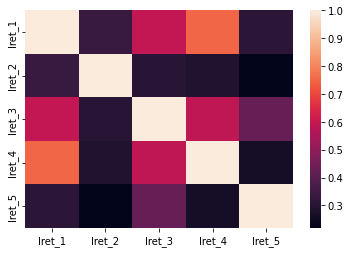

In [231]:
# Join tickers in single DataFrame

lret_1 = log_return(data['Inst-1-close'])[1:]
lret_1.rename('lret_1', inplace=True)

lret_2 = log_return(data['Inst-2-close'])[1:]
lret_2.rename('lret_2', inplace=True)

lret_3 = log_return(data['Inst-3-close'])[1:]
lret_3.rename('lret_3', inplace=True)

lret_4 = log_return(data['Inst-4-close'])[1:]
lret_4.rename('lret_4', inplace=True)

lret_5 = log_return(data['Inst-5-close'])[1:]
lret_5.rename('lret_5', inplace=True)

two_assets = pd.concat([lret_1, lret_2, lret_3, lret_4, lret_5], axis=1)

# Heatmap for the correlation
sns.heatmap(two_assets.corr())

We can see here that the logarithmic returns of ticker 1 has high correlation with logarithmic returns of tickers 4 and 3; ticker 3 has high correlation with ticker 4 and 5

In [232]:
# Export the log return table to excel
two_assets.to_excel('task_1.xlsx', sheet_name='lret')

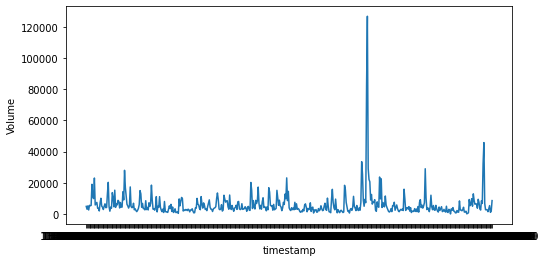

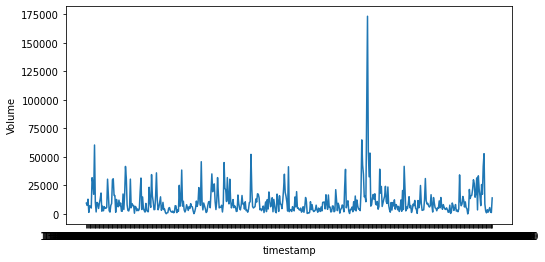

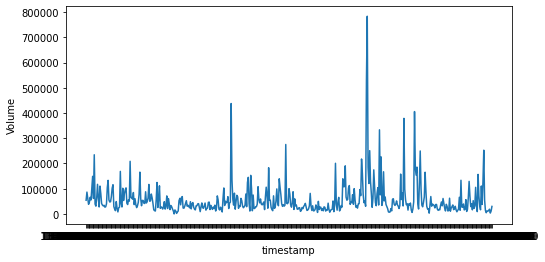

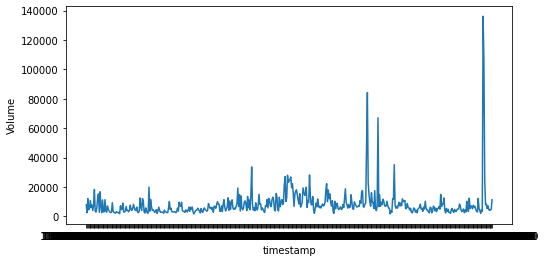

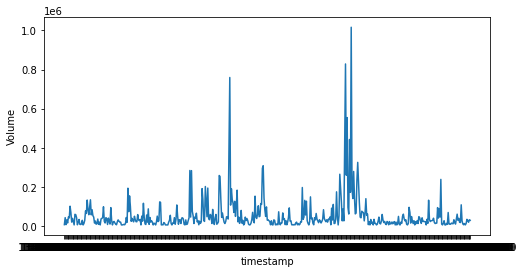

In [233]:
# Scatter plot or line plot for volume against datetime
volume_list = ['Inst-1-volume', 'Inst-2-volume', 'Inst-3-volume', 'Inst-4-volume', 'Inst-5-volume']
for item in volume_list:
  plt.figure(figsize=(8,4))
  sns.lineplot(x=data['datetime'], y=data[item])
  plt.xlabel('timestamp')
  plt.ylabel('Volume')
  plt.show()

Observations:

1. For ticker 1, we can note the closing prices and volatility at volume greater than or equal to 20,000
2. For ticker 2, we can note the closing price and volatility at volume greater than or equal to 25,000
3. For ticker 3, we can note the closing price and volatility at volume greater than or equal to 200,000
4. For ticker 4, we can note the closing price and volatility at volume greater than or equal to 20,000
5. For ticker 5, we can note the closing price and volatility at volume greater than or equal to 0.1

## Exploratory Data Analysis

<AxesSubplot:xlabel='Inst-1-volume', ylabel='Inst-1-close'>

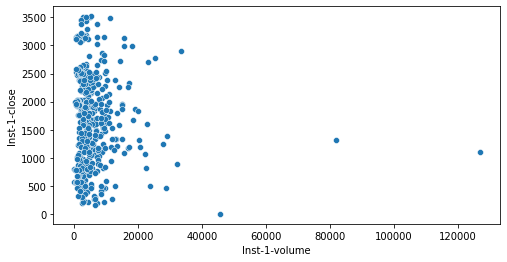

In [234]:
# Plot of volume versus closing prices for ticker 1
plt.figure(figsize=(8,4))
sns.scatterplot(x=data['Inst-1-volume'], y=data['Inst-1-close'])

For ticker 1, we can set the volume concentration from 0 to 20,000. Outside this region, the closing price and the volume are so much dispersed.

<AxesSubplot:xlabel='Inst-2-volume', ylabel='Inst-2-close'>

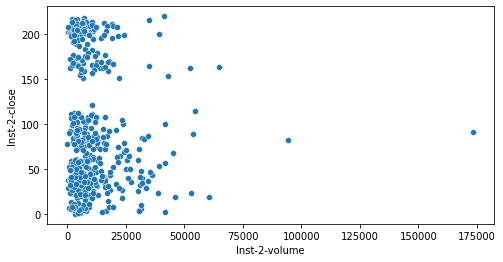

In [235]:
# Plot of volume versus closing prices for ticker 2
plt.figure(figsize=(8,4))
sns.scatterplot(x=data['Inst-2-volume'], y=data['Inst-2-close'])

For ticker 2, we can set the volume concentration from 0 to 25,000. Outside this region, the closing price and the volume are so much dispersed.

<AxesSubplot:xlabel='Inst-3-volume', ylabel='Inst-3-close'>

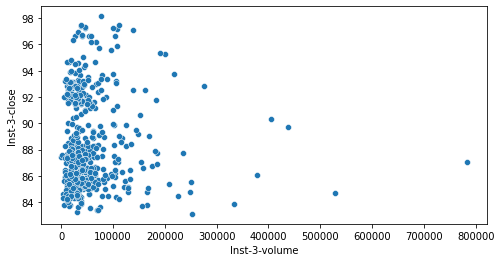

In [236]:
# Plot of volume versus closing prices for ticker 3
plt.figure(figsize=(8,4))
sns.scatterplot(x=data['Inst-3-volume'], y=data['Inst-3-close'])

For ticker 3, we can set the volume concentration from 0 to 100,000. Outside this region, the closing price and the volume are so much dispersed.

<AxesSubplot:xlabel='Inst-4-volume', ylabel='Inst-4-close'>

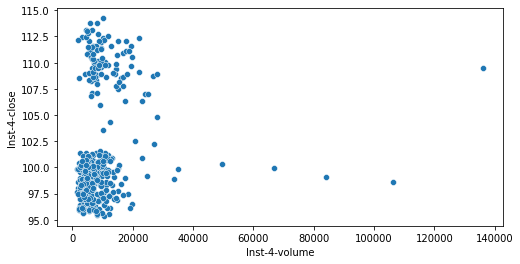

In [237]:
# Plot of volume versus closing prices for ticker 4
plt.figure(figsize=(8,4))
sns.scatterplot(x=data['Inst-4-volume'], y=data['Inst-4-close'])

For ticker 4, we can set the volume concentration from 0 to 20,000. Outside this region, the closing price and the volume are so much dispersed.

<AxesSubplot:xlabel='Inst-5-volume', ylabel='Inst-5-close'>

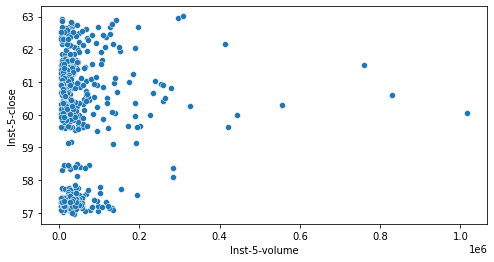

In [238]:
# Plot of volume versus closing prices for ticker 5
plt.figure(figsize=(8,4))
sns.scatterplot(x=data['Inst-5-volume'], y=data['Inst-5-close'])

For ticker 5, we can set the volume concentration from 0 to around 0.1. Outside this region, the closing price and the volume are so much dispersed.

## Statistical Analysis

In [239]:
# Describe the lret_1 column
data['lret_1'].describe(include='all')

count    497.000000
mean       0.000458
std        0.130433
min       -0.696782
25%       -0.033125
50%        0.004059
75%        0.038857
max        1.202559
Name: lret_1, dtype: float64

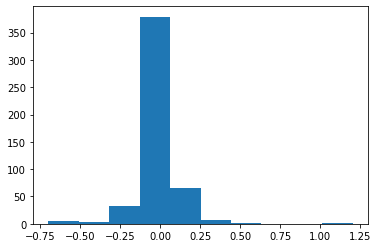

In [240]:
# Determine the distribution of logarithmic returns
plt.hist(x=data['lret_1'])
plt.show()

In [241]:
two_assets['lret_1']

2      0.001701
3     -0.015850
4     -0.018213
5     -0.055417
6      0.024606
         ...   
495    0.431473
496   -0.060472
497   -0.020114
498   -0.085246
499    0.191975
Name: lret_1, Length: 498, dtype: float64

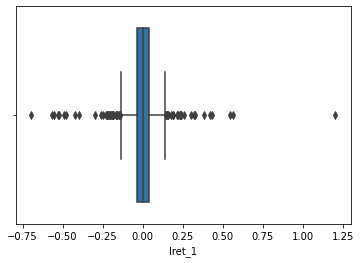

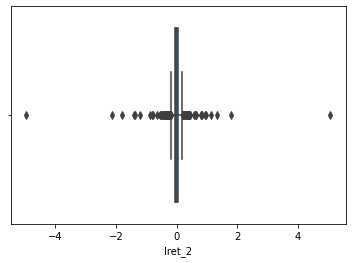

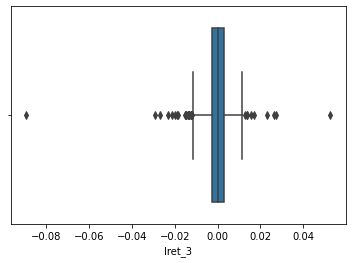

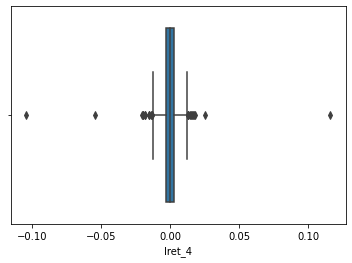

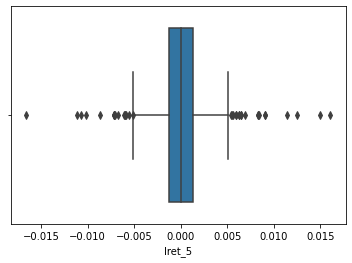

In [242]:
# Create box plots for the logarithmic returns
for item in two_assets.columns:
    sns.boxplot(x=two_assets[item])
    plt.show()

### Q-Q Plot

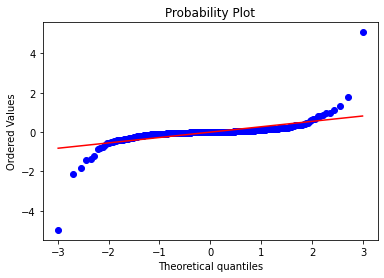

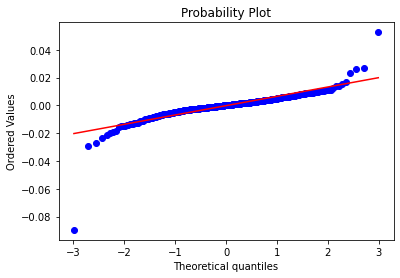

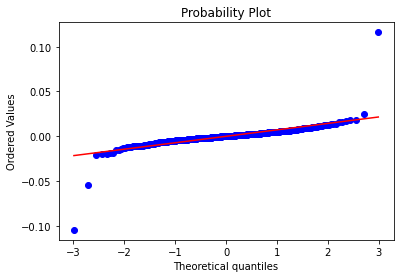

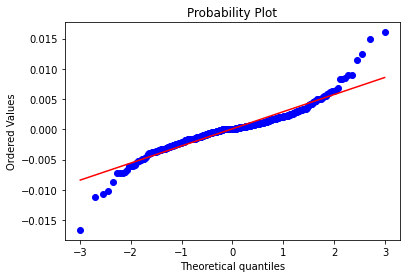

In [243]:
import pylab
import scipy.stats as stats

lret_columns = ['lret_2', 'lret_3', 'lret_4', 'lret_5']
for item in lret_columns:
    stats.probplot(data[item], dist='norm', plot=pylab)
    pylab.show()

Only ticker 5 has logarithmic return distribution which is closer to normal distribution than the other tickers

### Jarque-Bera Test

In [244]:
from scipy.stats import jarque_bera

for item in lret_columns:
    result = (jarque_bera(data[item]))

    print(f"JB statistic: {result[0]}")
    print(f"p-value: {result[1]}")

JB statistic: 154089.64887091733
p-value: 0.0
JB statistic: 34919.549848061055
p-value: 0.0
JB statistic: 125550.51250110341
p-value: 0.0
JB statistic: 823.9519461074314
p-value: 0.0


### Kolmogorov-Smirnov Test

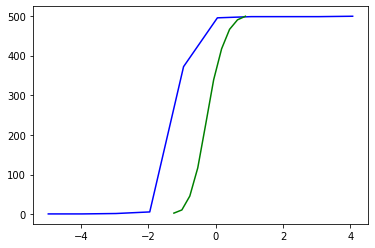

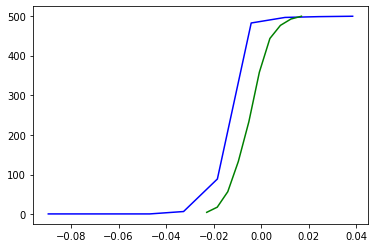

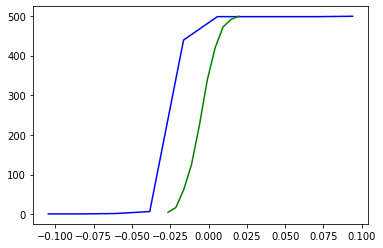

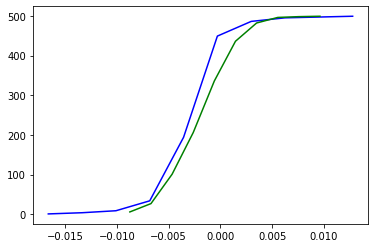

In [245]:
for item in lret_columns:
    data_norm = np.random.normal(np.mean(data[item]), np.std(data[item]), len(data))
    values, base = np.histogram(data[item])
    values_norm, base_norm = np.histogram(data_norm)
    cumulative = np.cumsum(values)
    cumulative_norm = np.cumsum(values_norm)

    plt.plot(base[:-1], cumulative, c='blue')
    plt.plot(base_norm[:-1], cumulative_norm, c='green')
    plt.show()

In [246]:
from scipy.stats import kstest

for item in lret_columns:
    result = (kstest(data[item], cdf='norm'))

    print(f"K-S statistic: {result[0]}")
    print(f"p-value: {result[1]}")

K-S statistic: 0.3468235335211167
p-value: 3.9365007233731445e-54
K-S statistic: 0.4871268089034362
p-value: 1.2655806477274108e-109
K-S statistic: 0.4887630330247592
p-value: 2.0833441261403397e-110
K-S statistic: 0.4935949024681686
p-value: 9.662005288105305e-113


### Anderson-Darling

In [247]:
from scipy.stats import anderson

for item in lret_columns:
    result = (anderson(data[item], dist='norm'))

    print(f"A-D statistic: {result[0]}")
    print(f"Critical values: {result[1]}")
    print(f"Significance levels: {result[2]}")

A-D statistic: 74.87214227712298
Critical values: [0.571 0.651 0.781 0.911 1.083]
Significance levels: [15.  10.   5.   2.5  1. ]
A-D statistic: 16.532153410435512
Critical values: [0.571 0.651 0.781 0.911 1.083]
Significance levels: [15.  10.   5.   2.5  1. ]
A-D statistic: 29.159721032391985
Critical values: [0.571 0.651 0.781 0.911 1.083]
Significance levels: [15.  10.   5.   2.5  1. ]
A-D statistic: 10.727641985173193
Critical values: [0.571 0.651 0.781 0.911 1.083]
Significance levels: [15.  10.   5.   2.5  1. ]


### Shapiro-Wilk Test

In [248]:
from scipy.stats import shapiro

for item in lret_columns:
    result = (shapiro(data[item]))

    print(f"S-W statistic: {result[0]}")
    print(f"p-value: {result[1]}")

S-W statistic: 0.44127440452575684
p-value: 1.3348383533820825e-36
S-W statistic: 0.7644490599632263
p-value: 4.0789476751867306e-26
S-W statistic: 0.5960752964019775
p-value: 1.9131182314576237e-32
S-W statistic: 0.9080140590667725
p-value: 8.238217960449194e-17


# Task 2: Trading Alpha

The goal of this portion of the project is to develop trading alpha(s) for the five (5) cryptocurrency tickers using technical indicators and support and resistance which will be fitted in a machine learning or deep learning algorithms to predict the logarithmic returns and buy/no trade decisions for each ticker. The performance of the machine learning algorithm would be then evaluated using various metrics.

For simplicity, only ticker 1 would be considered for this part. But the general process of developing the trading alpha would be the same for all the tickers

## Feature Engineering

### Moving Average 9

In [249]:
# Create another column for Moving Average 9 for ticker 1
MA_9_1 = list()

for value in data['Inst-1-close'][0:9]:
  moving_average = 0.1
  MA_9_1.append(moving_average)

index = 0
for value in data['Inst-1-close'][9:]:
  moving_average = data['Inst-1-close'][index:index+8].mean()
  MA_9_1.append(moving_average)
  index += 1

# Add the MA_9 column to the exisitng dataframe
data['MA_9_1'] = pd.DataFrame(MA_9_1)

### Moving Average 20

In [250]:
# Create another column for Moving Average 20 for ticker 1
MA_20_1 = list()

for value in data['Inst-1-close'][0:20]:
  moving_average = 0.1
  MA_20_1.append(moving_average)

index = 0
for value in data['Inst-1-close'][20:]:
  moving_average = data['Inst-1-close'][index:index+19].mean()
  MA_20_1.append(moving_average)
  index += 1

# Add the MA_20 column to the exisitng dataframe
data['MA_20_1'] = pd.DataFrame(MA_20_1)

### Decision Matrix

In this project, we will not be considering short selling, only buying the dips. If there is no market opportunity based on the matrix, the algorithm will enter 'No Trade'

#### Ticker 1

In [251]:
# Create a function for the initial decision matrix (Buy or Sell or No Trade) for ticker 1
Decision_List_1 = data.loc[:, ['Inst-1-close', 'Inst-1-volume', 'MA_9_1', 'MA_20_1']].values.tolist()
Decision_Tuple_1 = [tuple(each_list) for each_list in Decision_List_1]

def Decision_1(close, volume, MA_9, MA_20):
  if ((MA_20 - MA_9)/MA_9)*100 > 0.01 and volume > 20000:
    return 'Buy'
  elif ((MA_20 - MA_9)/MA_9)*100 > 0.01:
    return 'Buy'

  else:
    return 'No Trade'

In [252]:
# Add a Buy/Sell column for ticker 1
Buy_Sell_1 = list()   # Initialize a list
for tup in Decision_Tuple_1:
  close, volume, MA_9, MA_20 = tup
  result = Decision_1(close, volume, MA_9, MA_20)
  Buy_Sell_1.append(result)

data['decision_1'] = pd.DataFrame(Buy_Sell_1)

Repeat the process for the deicsion matrix for all the remaining tickers

In [253]:
# Decision value counts for ticker 1
data['decision_1'].value_counts()

Buy         254
No Trade    244
Name: decision_1, dtype: int64

## Backtesting

Backtesting is the term used in financial markets trading wherein a trading strategy is applied on historical data (candlestick chart). Corresponding metrics like winrate and total percentage gain or loss are then calculated from the backtesting result.
For the sake of demonstration, only ticker 1 was backtested

### Ticker 1

The risk to reward:ratio was set to 1:2. Note that the SL and TP levels can be further optimized using machine learning algorithms or reinforcement learning algorithms which were not covered in this project.

In [254]:
# Create a function to determine the hit of each trade
Close_List_1 = data.loc[:, ['decision_1', 'Inst-1-close', 'Inst-1-open', 'Inst-1-high', 'Inst-1-low']].values.tolist()
Close_Tuple_1 = [tuple(item) for item in Close_List_1]

def Hit_1(B_S, close, open, high, low):
  for item in Close_Tuple_1:
    if B_S == 'Buy':
      for value in Close_Tuple_1:
        close_index = 0
        high_index = 0
        low_index = 0
        while open > 0:
          if ((open - Close_Tuple_1[close_index][1]) / open) <= -0.75:
            close_index += 1
            return 'TP on Buy'
            break
          elif ((open - Close_Tuple_1[high_index][3]) / open) <= -0.75:
            high_index += 1
            return 'TP on Buy'
            break
          else:
            if ((open - Close_Tuple_1[close_index][1]) / open) >= 0.375:
              close_index += 1
              return 'SL on Buy'
              break
            elif ((open - Close_Tuple_1[low_index][4]) / open) >= -0.375:
              low_index += 1
              return 'SL on Buy'
              break

            else:
              close_index += 1
              continue

    elif B_S == 'No Trade':
      return 'No Trade'

    else:
      return 'No Trade'

In [255]:
# Add TP/SL column
TP_SL_1 = list()   # Initialize a list

for item in Close_Tuple_1:
  B_S, close, open, high, low = item
  result_1 = Hit_1(B_S, close, open, high, low)
  TP_SL_1.append(result_1)

data['hit_1'] = pd.DataFrame(TP_SL_1)

In [256]:
# Determine the value counts for hit_1 column
data['hit_1'].value_counts()

No Trade     244
TP on Buy    159
SL on Buy     94
Name: hit_1, dtype: int64

In [257]:
# Determine the win rate for the backtest
TP = data[data['hit_1']=='TP on Buy']['hit_1'].count() + data[data['hit_1']=='TP on Sell']['hit_1'].count()
SL = data[data['hit_1']=='SL on Buy']['hit_1'].count() + data[data['hit_1']=='SL on Sell']['hit_1'].count()

winrate = TP / (SL + TP) * 100
print(winrate)

62.845849802371546


## Simulation

We will start qwith 100,000USD for the simulation trading. Every trade, we will risk 3% of every remaining capital.

In [258]:
# View the data
data

,datetime,Inst-1-open,Inst-1-high,Inst-1-low,Inst-1-close,Inst-1-volume,Inst-2-open,Inst-2-high,Inst-2-low,Inst-2-close,...,Inst-5-volume,lret_1,lret_2,lret_3,lret_4,lret_5,MA_9_1,MA_20_1,decision_1,hit_1
1,13-09-19 04:00:00,2250.6,2352.4,2215.6,2349.0,4839,60.817073,66.304878,58.048780,65.182927,...,6429,0.042793,0.069327,0.005385,0.003841,-0.000376,0.100,0.100000,No Trade,No Trade
2,13-09-19 05:00:00,2349.0,2368.8,2293.2,2353.0,2992,65.182927,67.280488,62.609756,64.048780,...,42143,0.001701,-0.017553,0.003878,0.000254,-0.000301,0.100,0.100000,No Trade,No Trade
3,13-09-19 06:00:00,2353.0,2369.2,2251.0,2316.0,5164,64.048780,65.841463,60.560976,61.256098,...,6429,-0.015850,-0.044582,-0.003747,-0.002455,0.001054,0.100,0.100000,No Trade,No Trade
4,13-09-19 07:00:00,2316.0,2329.8,2242.4,2274.2,2526,61.256098,61.695122,57.182927,59.000000,...,30714,-0.018213,-0.037526,-0.001748,0.000819,-0.002336,0.100,0.100000,No Trade,No Trade
5,13-09-19 08:00:00,2274.2,2379.8,2139.8,2151.6,5519,59.000000,63.573171,54.243902,54.621951,...,15000,-0.055417,-0.077102,-0.004646,-0.004498,0.001432,0.100,0.100000,No Trade,No Trade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,03-10-19 18:00:00,318.8,534.0,318.8,490.8,3499,41.000000,51.975610,41.012195,49.573171,...,33571,0.431473,0.189878,0.003320,0.007817,0.004126,292.300,302.063158,No Trade,TP on Buy
496,03-10-19 19:00:00,490.8,627.0,391.4,462.0,5327,49.573171,54.268293,43.536585,46.621951,...,27143,-0.060472,-0.061378,-0.000095,-0.006782,-0.002604,320.025,301.768421,Buy,No Trade
497,03-10-19 20:00:00,462.0,513.6,406.6,452.8,1011,46.621951,53.073171,45.158537,49.134146,...,18571,-0.020114,0.052483,-0.001754,0.001521,0.002170,265.850,305.084211,No Trade,No Trade
498,03-10-19 21:00:00,452.8,481.2,354.2,415.8,1807,49.134146,52.585366,44.756098,48.804878,...,31429,-0.085246,-0.006724,-0.000997,-0.006587,0.001661,322.475,315.168421,No Trade,No Trade


In [259]:
# Create a column for profits
trades = [0]

for item in data['hit_1']:
  balance = 100000
  trade_index = 0
  if item == 'No Trade':
    balance = balance + trades[trade_index - 1]
    trade = balance * 0
    trades.append(trade)
    trade_index += 1

  elif item == 'TP on Buy':
    balance = balance + trades[trade_index - 1]
    trade = balance * 0.03 * 0.75
    trades.append(trade)
    trade_index += 1

  else:
    if item == 'SL on Buy':
      balance = balance + trades[trade_index - 1]
      trade = balance * 0.03 * -0.375
      trades.append(trade)
      trade_index += 1
    
    else:
      continue

# Create another column for trades
data['profit'] =  pd.DataFrame(trades)
data.head(10)

,datetime,Inst-1-open,Inst-1-high,Inst-1-low,Inst-1-close,Inst-1-volume,Inst-2-open,Inst-2-high,Inst-2-low,Inst-2-close,...,lret_1,lret_2,lret_3,lret_4,lret_5,MA_9_1,MA_20_1,decision_1,hit_1,profit
1,13-09-19 04:00:00,2250.6,2352.4,2215.6,2349.0,4839,60.817073,66.304878,58.048780,65.182927,...,0.042793,0.069327,0.005385,0.003841,-0.000376,0.100,0.1,No Trade,No Trade,0.0
2,13-09-19 05:00:00,2349.0,2368.8,2293.2,2353.0,2992,65.182927,67.280488,62.609756,64.048780,...,0.001701,-0.017553,0.003878,0.000254,-0.000301,0.100,0.1,No Trade,No Trade,0.0
3,13-09-19 06:00:00,2353.0,2369.2,2251.0,2316.0,5164,64.048780,65.841463,60.560976,61.256098,...,-0.015850,-0.044582,-0.003747,-0.002455,0.001054,0.100,0.1,No Trade,No Trade,0.0
4,13-09-19 07:00:00,2316.0,2329.8,2242.4,2274.2,2526,61.256098,61.695122,57.182927,59.000000,...,-0.018213,-0.037526,-0.001748,0.000819,-0.002336,0.100,0.1,No Trade,No Trade,0.0
5,13-09-19 08:00:00,2274.2,2379.8,2139.8,2151.6,5519,59.000000,63.573171,54.243902,54.621951,...,-0.055417,-0.077102,-0.004646,-0.004498,0.001432,0.100,0.1,No Trade,No Trade,0.0
6,13-09-19 09:00:00,2151.6,2214.8,2062.4,2205.2,5210,54.621951,57.792683,51.658537,57.634146,...,0.024606,0.053679,0.001493,0.001700,0.000527,0.100,0.1,No Trade,No Trade,0.0
7,13-09-19 10:00:00,2205.2,2214.4,2030.0,2165.8,5456,57.634146,58.853659,52.682927,57.195122,...,-0.018028,-0.007647,-0.000351,-0.003516,0.000301,0.100,0.1,No Trade,No Trade,0.0
8,13-09-19 11:00:00,2165.8,2184.2,1774.2,1872.6,18995,57.195122,57.609756,37.841463,39.914634,...,-0.145462,-0.359726,-0.013921,-0.009418,-0.002940,0.100,0.1,No Trade,No Trade,0.0
9,13-09-19 12:00:00,1872.6,1900.0,1757.4,1837.4,11265,39.914634,40.304878,32.682927,35.792683,...,-0.018976,-0.109000,-0.007684,-0.004454,-0.000377,2210.925,0.1,No Trade,No Trade,0.0
10,13-09-19 13:00:00,1837.4,1859.0,1698.4,1738.0,9828,35.792683,37.500000,27.597561,30.036585,...,-0.055617,-0.175327,-0.003414,-0.008504,-0.002117,2146.975,0.1,No Trade,No Trade,0.0


In [260]:
# Determine the %PnL and total PnL
percent_pnl = ((data['profit'].sum() + 100000)/100000)*100

total_pnl = data['profit'].sum()

print(f'The %Pnl is {percent_pnl}%')
print(f'The total Pnl is {total_pnl}USD')

The %Pnl is 360.12482966120365%
The total Pnl is 260124.8296612037USD


Text(0, 0.5, 'Profit')

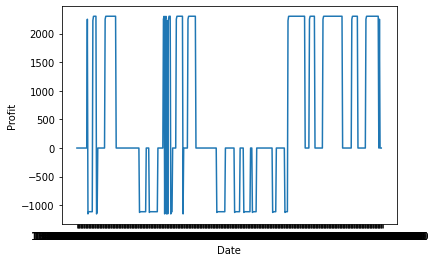

In [261]:
# Plot the profits over time
sns.lineplot(x=data['datetime'], y=data['profit'])
plt.xlabel('Date')
plt.ylabel('Profit')

In [262]:
# Export the decision_1 dataframe to excel
data['decision_1'].to_excel('trade_ticker1.xlsx', sheet_name='decision')

## Machine Learning

We will try to use Artificial Neural Network in modelling the logairthmic returns since the tickers are extremely volatile in nature.

### Artificial Neural Network

In [263]:
data.dropna(inplace=True)

In [264]:
# Import model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [265]:
# Define and X and y
X = data[['Inst-1-open', 'Inst-1-high', 'Inst-1-low', 'Inst-1-close', 'Inst-1-volume', 'MA_9_1', 'MA_20_1', 'decision_1']]
y = data['lret_1']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [266]:
# Select columns
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

cat_columns_train = cat_selector(X_train)
cat_columns_test = cat_selector(X_test)
num_columns_train = num_selector(X_train)
num_columns_test = num_selector(X_test)

cat_data_train = X_train[cat_columns_train]
cat_data_test = X_test[cat_columns_test]
num_data_train = X_train[num_columns_train]
num_data_test = X_test[num_columns_test]

# Instantiate OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform using ohe
ohe_train = ohe.fit_transform(cat_data_train)
ohe_test = ohe.transform(cat_data_test)

# Instantiate scaler
scaler = StandardScaler()

# Fit and transform to the Xtrain and Xtest
train_scale = scaler.fit_transform(num_data_train)
test_scale = scaler.transform(num_data_test)

# Make imputer pipeline for imputer, scaler and ohe
pipe = make_pipeline(ohe, scaler)

In [267]:
# Make a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', pipe, num_selector), 
        ("cat", pipe, cat_selector)
    ]
)

In [268]:
# Fit with the Xtrain
X_train = pd.DataFrame(preprocessor.fit_transform(X_train))

# Fit transformer with the Xtest
X_test = pd.DataFrame(preprocessor.transform(X_test))

In [269]:
# Step 1: Define our network structure
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape

2545

Epoch 1/20
12/12 [==============================] - 1s 16ms/step - loss: 0.3689 - val_loss: 0.0694
Epoch 2/20
12/12 [==============================] - 0s 5ms/step - loss: 0.1014 - val_loss: 0.0220
Epoch 3/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0426 - val_loss: 0.0154
Epoch 4/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0250 - val_loss: 0.0144
Epoch 5/20
12/12 [==============================] - 0s 6ms/step - loss: 0.0178 - val_loss: 0.0142
Epoch 6/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0146 - val_loss: 0.0141
Epoch 7/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0126 - val_loss: 0.0140
Epoch 8/20
12/12 [==============================] - 0s 6ms/step - loss: 0.0116 - val_loss: 0.0140
Epoch 9/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0110 - val_loss: 0.0140
Epoch 10/20
12/12 [==============================] - 0s 5ms/step - loss: 0.0105 - val_loss: 0.0140
Epoch 11/20
12/12 

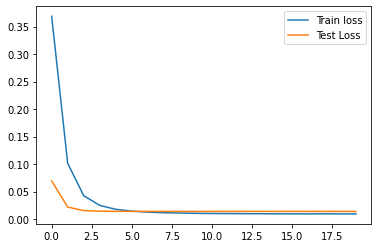

In [270]:
# Sequential model
model = Sequential()

# First hidden layer
model.add(Dense(30,
                input_dim = input_shape,
                activation = 'relu'))
# Second hidden layer
model.add(Dense(10,
                activation = 'relu'))

# Output layer
model.add(Dense(1, activation = 'sigmoid'))

# Step 2: Compile
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=20)

# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

The train and test loss is close to 0. This is enough.

### Classification

For this part of the project, the goal is to develop a machine learning algorithm for the 'perfect trade' scenarios. Based on the set SL and TP, any SL hit were back-engineered to develop the 'perfect trade' scenario. This was set as the target vector for the classification algorithm.

#### Random Forest Classifier

In [271]:
# Create another column for the "perfect trade" as target y
perfect_trade_list = list()
for value in data['hit_1'].to_list():
  if value == 'No Trade':
    perfect_trade_list.append('No Trade')
  elif value == 'SL on Buy':
    perfect_trade_list.append('Sell')
  elif value == 'SL on Sell':
    perfect_trade_list.append('Buy')
  elif value == 'TP on Sell':
    perfect_trade_list.append('Sell')
  else:
    perfect_trade_list.append('Buy')
  
data['perfect_trade_1'] = pd.DataFrame(perfect_trade_list)
data.head()

,datetime,Inst-1-open,Inst-1-high,Inst-1-low,Inst-1-close,Inst-1-volume,Inst-2-open,Inst-2-high,Inst-2-low,Inst-2-close,...,lret_2,lret_3,lret_4,lret_5,MA_9_1,MA_20_1,decision_1,hit_1,profit,perfect_trade_1
1,13-09-19 04:00:00,2250.6,2352.4,2215.6,2349.0,4839,60.817073,66.304878,58.048780,65.182927,...,0.069327,0.005385,0.003841,-0.000376,0.1,0.1,No Trade,No Trade,0.0,No Trade
2,13-09-19 05:00:00,2349.0,2368.8,2293.2,2353.0,2992,65.182927,67.280488,62.609756,64.048780,...,-0.017553,0.003878,0.000254,-0.000301,0.1,0.1,No Trade,No Trade,0.0,No Trade
3,13-09-19 06:00:00,2353.0,2369.2,2251.0,2316.0,5164,64.048780,65.841463,60.560976,61.256098,...,-0.044582,-0.003747,-0.002455,0.001054,0.1,0.1,No Trade,No Trade,0.0,No Trade
4,13-09-19 07:00:00,2316.0,2329.8,2242.4,2274.2,2526,61.256098,61.695122,57.182927,59.000000,...,-0.037526,-0.001748,0.000819,-0.002336,0.1,0.1,No Trade,No Trade,0.0,No Trade
5,13-09-19 08:00:00,2274.2,2379.8,2139.8,2151.6,5519,59.000000,63.573171,54.243902,54.621951,...,-0.077102,-0.004646,-0.004498,0.001432,0.1,0.1,No Trade,No Trade,0.0,No Trade


In [272]:
# Drop the null values
data.dropna(inplace=True)

In [273]:
# Define and X and y
X = data[['Inst-1-open', 'Inst-1-high', 'Inst-1-low', 'Inst-1-close', 'Inst-1-volume', 'MA_9_1', 'MA_20_1', 'lret_1']]
y = data['perfect_trade_1']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [274]:
# Select columns
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

cat_columns_train = cat_selector(X_train)
cat_columns_test = cat_selector(X_test)
num_columns_train = num_selector(X_train)
num_columns_test = num_selector(X_test)

cat_data_train = X_train[cat_columns_train]
cat_data_test = X_test[cat_columns_test]
num_data_train = X_train[num_columns_train]
num_data_test = X_test[num_columns_test]

# Instantiate OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform using ohe
ohe_train = ohe.fit_transform(cat_data_train)
ohe_test = ohe.transform(cat_data_test)

# Instantiate scaler
scaler = StandardScaler()

# Fit and transform to the Xtrain and Xtest
train_scale = scaler.fit_transform(num_data_train)
test_scale = scaler.transform(num_data_test)

# Make imputer pipeline for imputer, scaler and ohe
pipe = make_pipeline(ohe, scaler)

In [275]:
# Make a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', pipe, num_selector), 
        ("cat", pipe, cat_selector)
    ]
)

# Fit with the Xtrain
X_train = pd.DataFrame(preprocessor.fit_transform(X_train))

# Fit transformer with the Xtest
X_test = pd.DataFrame(preprocessor.transform(X_test))

In [276]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# Instantiate Random Forest
rf_class = RandomForestClassifier(random_state=101)

In [277]:
# Create a pipeline for the random forest
rf_class_pipe = Pipeline(
    steps=[('preprocessor', preprocessor), ('random forest classifier', rf_class)]
)

# Fit the model with the training data
rf_class_pipe.fit(X_train, y_train)

# Predict with the test set
rf_class_pipe.predict(X_test)

# Evaluate the model
rf_class_train_score = rf_class_pipe.score(X_train, y_train)
rf_class_test_score = rf_class_pipe.score(X_test, y_test)
print(f"Train score is {rf_class_train_score}")
print(f"Test score is {rf_class_test_score}")

Train score is 1.0
Test score is 0.4959349593495935


#### XGBoost Classifier

In [278]:
# Import the model
from xgboost import XGBClassifier

# Instantiate the model
xgb_class = XGBClassifier()

In [279]:
# Make a pipeline
xgb_class_pipe = Pipeline(
    steps=(['preprocessor', preprocessor], ['XGBoost Classifier', xgb_class])
)

# Fit the model
xgb_class_pipe.fit(X_train, y_train)

# Predict
xgb_class_predictions_train = xgb_class_pipe.predict(X_train)
xgb_class_predictions_test = xgb_class_pipe.predict(X_test)

C:\Users\Rhaniel delos Santos\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [280]:
# Evaluate the model
xgb_class_score_train = accuracy_score(y_train, xgb_class_predictions_train)
xgb_class_score_test = accuracy_score(y_test, xgb_class_predictions_test)

print(f"The score of the XGBoost Classifier model for training set is {xgb_class_score_train}")
print(f"The score of the XGBoost Classifier model for testing set is {xgb_class_score_test}")

The score of the XGBoost Classifier model for training set is 0.4932249322493225
The score of the XGBoost Classifier model for testing set is 0.4959349593495935
